In [1]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from keras.utils.vis_utils import plot_model
import keras
from tensorflow.keras.utils import load_img, img_to_array
import tensorflow.keras.preprocessing.image

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Conv2D, MaxPool2D,MaxPooling2D, Dropout, Dense, Flatten
import visualkeras

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation

from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score 
from sklearn.metrics import accuracy_score

In [3]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from glob import glob
from matplotlib import pyplot as plt



In [4]:
base_dir=r"D:\university\Thesis\Dataset -20221005T155507Z-002\New folder"

In [37]:
IMAGE_SIZE=250
BATCH_SIZE=1

train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    
    
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)

validation_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    
    validation_split=0.1
)
    

In [38]:
  
train_genarator=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
    

) 

validation_generator=validation_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
    

) 

Found 1301 images belonging to 2 classes.
Found 185 images belonging to 2 classes.


In [39]:
folders=glob(r"D:\university\Thesis\Dataset -20221005T155507Z-002\New folder\*")
print(len(folders))

2


In [40]:
tf.keras.backend.clear_session()

In [51]:
model = Sequential()
model.add(Conv2D(input_shape=(250,250,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(3,3)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))

In [52]:
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(units=2,activation="softmax"))

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 250, 250, 64)      1792      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 250, 250, 64)      36928     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 250, 250, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 125, 125, 64)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 125, 125, 128)     73856     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 125, 125, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 42, 42, 128)      

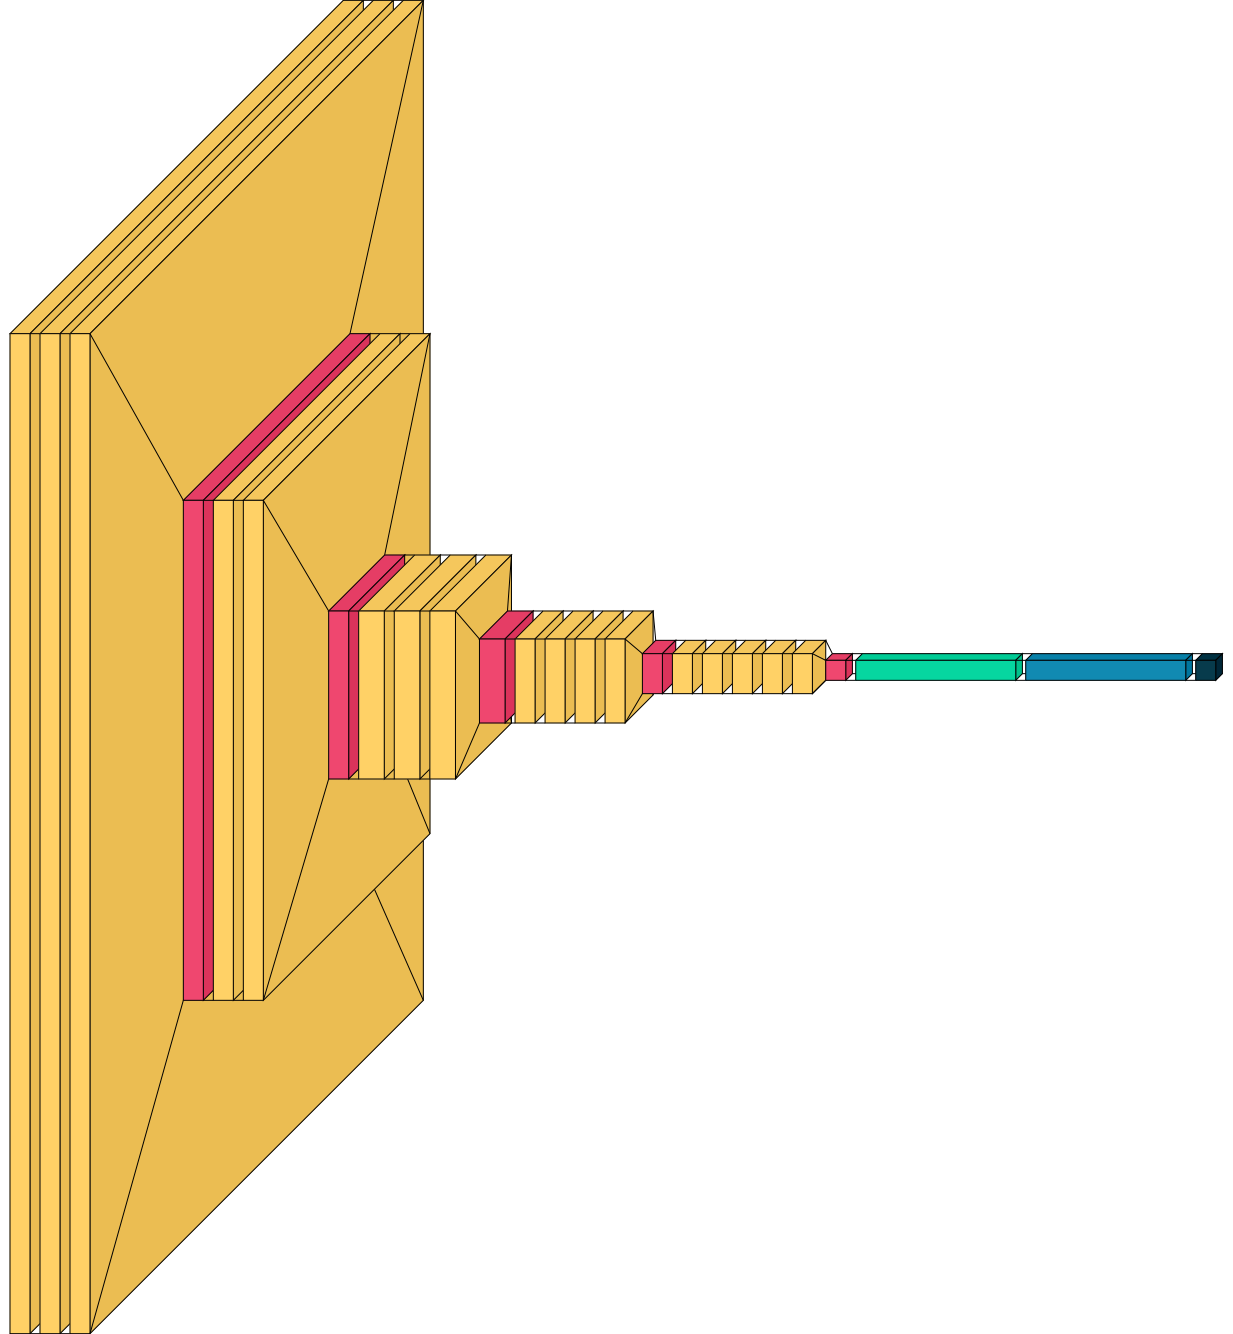

In [54]:
visualkeras.layered_view(model)

In [55]:
#from tensorflow.keras.utils import plot_model
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras import Model

#from tensorflow.keras.utils import plot_model
#from tensorflow.keras.layers import Input, Dense, BatchNormalization
#from IPython.core.display import Image

In [56]:
#keras.utils.plot_model(model, show_shapes=True)

In [57]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import datetime

In [58]:
learn_control = ReduceLROnPlateau(monitor='accuracy', patience=5,
                                  verbose=0,factor=0.1, min_lr=1e-7)
earlyStopping = EarlyStopping(monitor='accuracy', patience=5, verbose=0, mode='max')
#mcp_save = ModelCheckpoint(r'C:\Users\faysa\Desktop\Flower_Recognition\final\model1_mcp.hdf5', save_best_only=True, monitor='val_loss', mode='min')

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [63]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
epoch=250

history = model.fit(train_genarator,
                 steps_per_epoch=len(train_genarator),
                  epochs=epoch,
                  validation_data=validation_generator,
                  validation_steps=len(validation_generator)
                 )

Epoch 1/250
1301/1301 [==============================] - 43s 32ms/step - loss: 0.6943 - accuracy: 0.4912 - val_loss: 0.6933 - val_accuracy: 0.4973
Epoch 2/250
 227/1301 [====>.........................] - ETA: 30s - loss: 0.6936 - accuracy: 0.4934

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

In [ ]:
classes=['Bloom','not Bloom']

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import random
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
img_pred=tf.keras.preprocessing.image.load_img(r"D:\university\Thesis\final\test\champa-600w-646109737.webp",target_size = (224,224))
img_pred=tf.keras.preprocessing.image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)
img_pred=img_pred/255

preds= [model1.predict(img_pred)]

print(preds)

m1 = np.amax(preds[0][0])
p1 = list(preds[0][0]).index(m1)

print(m1)

classes[p1]
